In [5]:
import pandas as pd
import networkx as nx

import sys
sys.path.append('scripts/')
import preprocessing

In [6]:
# Load the disease-gene association data
dga_file_path = 'data/disease_gene.tsv'
ppi_file_path = 'data/PPI.csv'

dga, ppi = preprocessing.preprocess_disease(ppi_file_path, dga_file_path)

# Create a new bipartite graph
B = nx.Graph()

# Add nodes with the bipartite attribute
B.add_nodes_from(dga['geneSymbol'], bipartite=0)  # Add genes
B.add_nodes_from(dga['diseaseName'], bipartite=1) # Add diseases

# Add edges between genes and diseases
B.add_edges_from(dga.values)

# Check if the graph is bipartite
is_bipartite = nx.is_bipartite(B)
print(f"Graph is bipartite: {is_bipartite}")


Graph is bipartite: True


In [7]:
# Projecting the bipartite graph onto disease nodes
projected_disease_graph = nx.algorithms.bipartite.projected_graph(B, nodes=dga.diseaseName.unique())

# Now, 'projected_disease_graph' is a graph where nodes are diseases and edges represent shared genes
projected_disease_graph

In [8]:
# Find the largest connected component
largest_cc_nodes = max(nx.connected_components(projected_disease_graph), key=len)
largest_cc_graph = projected_disease_graph.subgraph(largest_cc_nodes).copy()

# Calculate the diameter of the largest connected component
diameter = nx.diameter(largest_cc_graph)
print(f"Diameter of the largest connected component: {diameter}")

Diameter of the largest connected component: 3


In [9]:
connected_components = nx.number_connected_components(projected_disease_graph)
print(f"Number of connected components: {connected_components}")


Number of connected components: 2


In [10]:
largest_cc = max(nx.connected_components(projected_disease_graph), key=len)
print(f"Size of the largest connected component: {len(largest_cc)}")


Size of the largest connected component: 919


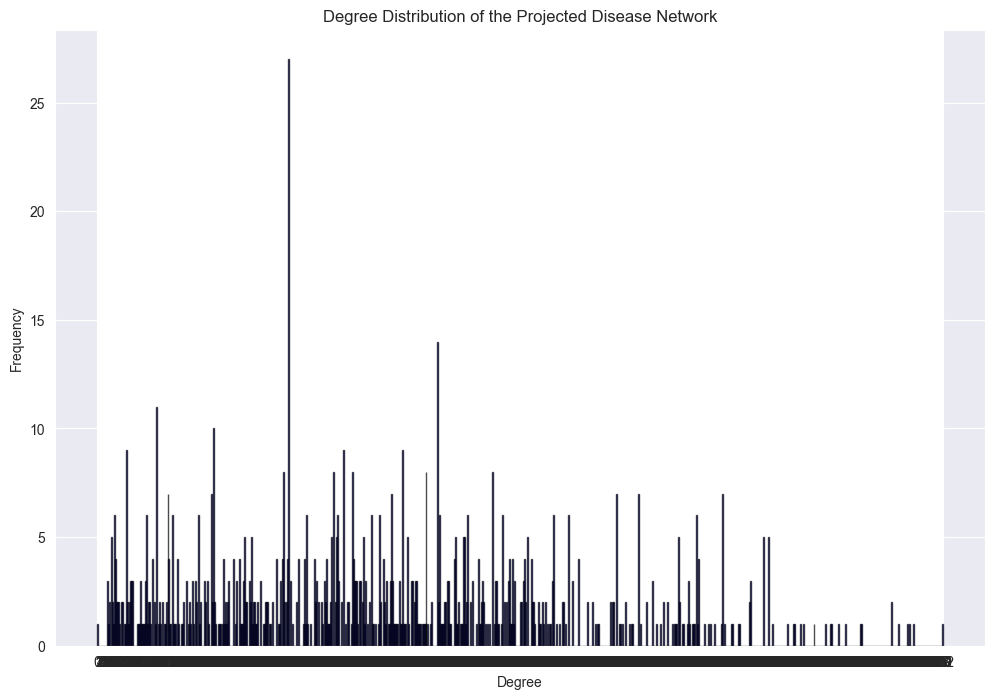

In [23]:
import matplotlib.pyplot as plt

# Calculate the degrees of each node in the projected disease network
degree_sequence = [d for n, d in projected_disease_graph.degree()]

# Create the histogram
plt.figure(figsize=(12, 8))
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1), alpha=0.7, color='blue', edgecolor='black')

plt.title('Degree Distribution of the Projected Disease Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xticks(range(min(degree_sequence), max(degree_sequence) + 1))

plt.show()


In [24]:
# You can define a threshold or just take the top X diseases with the highest degree
top_diseases = sorted(projected_disease_graph.degree, key=lambda x: x[1], reverse=True)[:10]  # Top 10 for example
print("Top 10 hub diseases:")
for disease, degree in top_diseases:
    print(f"{disease}: {degree}")


Top 10 hub diseases:
malignant neoplasm of breast: 852
schizophrenia: 822
malignant neoplasm of prostate: 818
colorectal carcinoma: 816
breast carcinoma: 807
mammary neoplasms, human: 800
mammary carcinoma, human: 800
liver carcinoma: 770
bipolar disorder: 769
malignant neoplasm of lung: 754


In [25]:
import numpy as np

largest_cc_nodes = max(nx.connected_components(projected_disease_graph), key=len)
largest_cc_graph = projected_disease_graph.subgraph(largest_cc_nodes)

# Calculate shortest path lengths for all pairs in the largest connected component
path_length_dict = dict(nx.shortest_path_length(largest_cc_graph))
all_path_lengths = [path_length_dict[node1][node2] for node1 in largest_cc_graph for node2 in largest_cc_graph if node1 != node2]


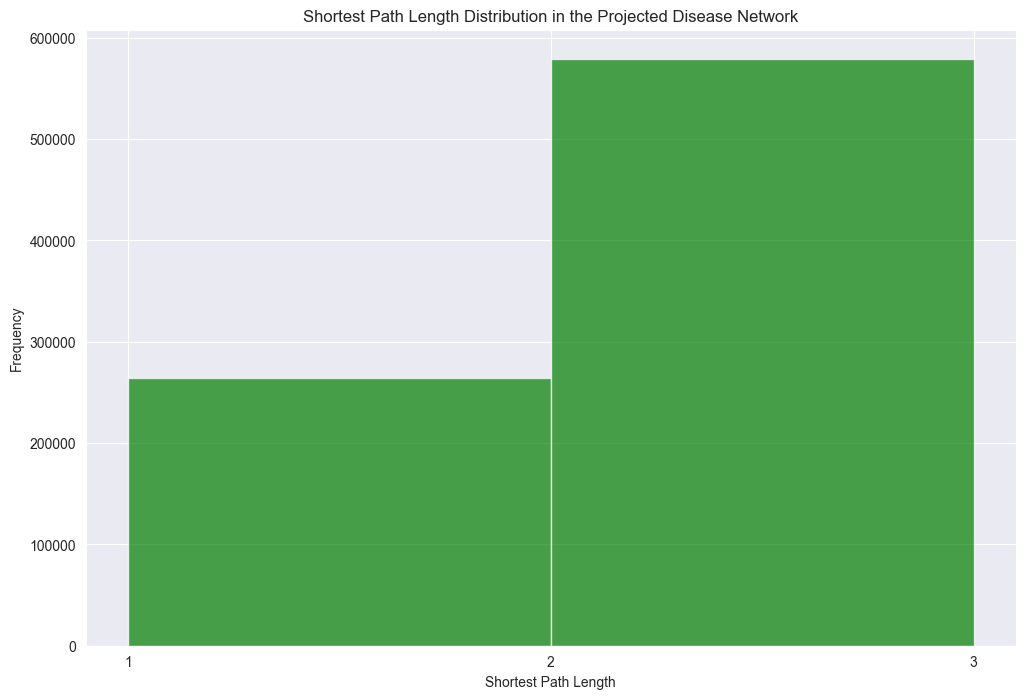

In [26]:
plt.figure(figsize=(12, 8))
plt.hist(all_path_lengths, bins=range(min(all_path_lengths), max(all_path_lengths) + 1), color='green', alpha=0.7)

plt.title('Shortest Path Length Distribution in the Projected Disease Network')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.xticks(range(min(all_path_lengths), max(all_path_lengths) + 1))

plt.show()